# DataFrame of One Uid

In [1]:
import json
import datetime
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get `Profiles.json`

In [3]:
with open('./profiles.json', 'r') as fp:
    profiles = json.load(fp)

In [4]:
list(profiles.keys())

['r1_01',
 'r1_02',
 'r1_03',
 'r1_04',
 'r1_05',
 'r1_06',
 'r1_07',
 'r1_08',
 'r1_09',
 'r1_10',
 'r2_01',
 'r2_02',
 'r2_03',
 'r2_04',
 'r2_05',
 'r2_06',
 'r2_07',
 'r2_08',
 'r2_09',
 'r2_10',
 'r3_01',
 'r3_02',
 'r3_03',
 'r3_04',
 'r3_05',
 'r3_06',
 'r3_07',
 'r3_08',
 'r3_09',
 'r3_10']

In [5]:
uid = 'r2_03'

In [6]:
profiles[uid]

{'hobo': '04',
 'garmin': '04',
 'embrace': '05',
 'round': 'r2',
 'id': '03',
 'dates': {'garmin': ['2020-10-23', '2020-10-24', '2020-10-25'],
  'embrace': ['2020-10-23', '2020-10-24', '2020-10-25'],
  'hobo': ['2020-10-23', '2020-10-24', '2020-10-25']}}

## 1. Hobo

In [7]:
pth_hobo = os.path.join('./hobo', 'profiles', uid, 'hobo.csv')
display(pth_hobo)
df_hobo = pd.read_csv(pth_hobo)

'./hobo/profiles/r2_03/hobo.csv'

In [8]:
df_hobo.time = pd.to_datetime(df_hobo.time)

In [9]:
df_hobo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      4320 non-null   datetime64[ns]
 1   env_temp  4320 non-null   float64       
 2   rh        4320 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 101.4 KB


In [10]:
df_hobo.head()

,time,env_temp,rh
0,2020-10-23 00:00:00,78.427,54.875
1,2020-10-23 00:01:00,78.471,54.848
2,2020-10-23 00:02:00,78.471,54.848
3,2020-10-23 00:03:00,78.471,54.879
4,2020-10-23 00:04:00,78.471,54.848


## 2. Garmin

### 2.1. Heart Rate

In [11]:
pth_garmin_hr = os.path.join('./garmin', 'profiles', uid, 'hr.csv')
display(pth_garmin_hr)
df_garmin_hr = pd.read_csv(pth_garmin_hr)

'./garmin/profiles/r2_03/hr.csv'

In [12]:
df_garmin_hr.time = pd.to_datetime(df_garmin_hr.time)

In [13]:
df_garmin_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        2157 non-null   datetime64[ns]
 1   heart_rate  2157 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 33.8 KB


In [14]:
df_garmin_hr.head()

,time,heart_rate
0,2020-10-23 10:56:00,78.0
1,2020-10-23 10:57:00,86.0
2,2020-10-23 10:58:00,84.0
3,2020-10-23 10:59:00,82.0
4,2020-10-23 11:00:00,80.0


In [15]:
df_garmin_hr.tail()

,time,heart_rate
2152,2020-10-25 00:05:00,84.0
2153,2020-10-25 00:06:00,69.0
2154,2020-10-25 00:07:00,71.0
2155,2020-10-25 00:09:00,74.0
2156,2020-10-25 00:10:00,73.0


### 2.2. Stress Level

In [16]:
pth_garmin_stress = os.path.join('./garmin', 'profiles', uid, 'stress.csv')
display(pth_garmin_stress)
df_garmin_stress = pd.read_csv(pth_garmin_stress)

'./garmin/profiles/r2_03/stress.csv'

In [17]:
df_garmin_stress.time = pd.to_datetime(df_garmin_stress.time)

In [18]:
df_garmin_stress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          4303 non-null   datetime64[ns]
 1   stress_level  4303 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.4 KB


In [19]:
df_garmin_stress.head(10)

,time,stress_level
0,2020-10-23 10:55:00,7.0
1,2020-10-23 10:57:00,42.0
2,2020-10-23 10:58:00,23.0
3,2020-10-23 10:59:00,13.0
4,2020-10-23 11:00:00,15.0
5,2020-10-23 11:01:00,21.0
6,2020-10-23 11:02:00,23.0
7,2020-10-23 11:03:00,24.0
8,2020-10-23 11:04:00,46.0
9,2020-10-23 11:05:00,37.0


In [20]:
# drop values < 0
df_garmin_stress = df_garmin_stress[df_garmin_stress.stress_level >= 0].reset_index(drop=True)

## 3. Embrace

### 3.1. EDA

In [21]:
pth_embrace_eda = os.path.join('./embrace', 'profiles', uid, 'eda.csv')
display(pth_embrace_eda)
df_embrace_eda = pd.read_csv(pth_embrace_eda)

'./embrace/profiles/r2_03/eda.csv'

In [22]:
df_embrace_eda.time = pd.to_datetime(df_embrace_eda.time)

In [23]:
df_embrace_eda['time_ms'] = df_embrace_eda.time

In [24]:
df_embrace_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585160 entries, 0 to 585159
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   time     585160 non-null  datetime64[ns]
 1   eda      585160 non-null  float64       
 2   time_ms  585160 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1)
memory usage: 13.4 MB


In [25]:
df_embrace_eda.head(10)

,time,eda,time_ms
0,2020-10-23 10:48:08.051,0.210509,2020-10-23 10:48:08.051
1,2020-10-23 10:48:08.301,0.008393,2020-10-23 10:48:08.301
2,2020-10-23 10:48:08.551,0.017142,2020-10-23 10:48:08.551
3,2020-10-23 10:48:08.801,0.009085,2020-10-23 10:48:08.801
4,2020-10-23 10:48:09.051,0.008739,2020-10-23 10:48:09.051
5,2020-10-23 10:48:09.301,0.007954,2020-10-23 10:48:09.301
6,2020-10-23 10:48:09.551,0.008519,2020-10-23 10:48:09.551
7,2020-10-23 10:48:09.801,0.005898,2020-10-23 10:48:09.801
8,2020-10-23 10:48:10.051,0.006926,2020-10-23 10:48:10.051
9,2020-10-23 10:48:10.301,0.009229,2020-10-23 10:48:10.301


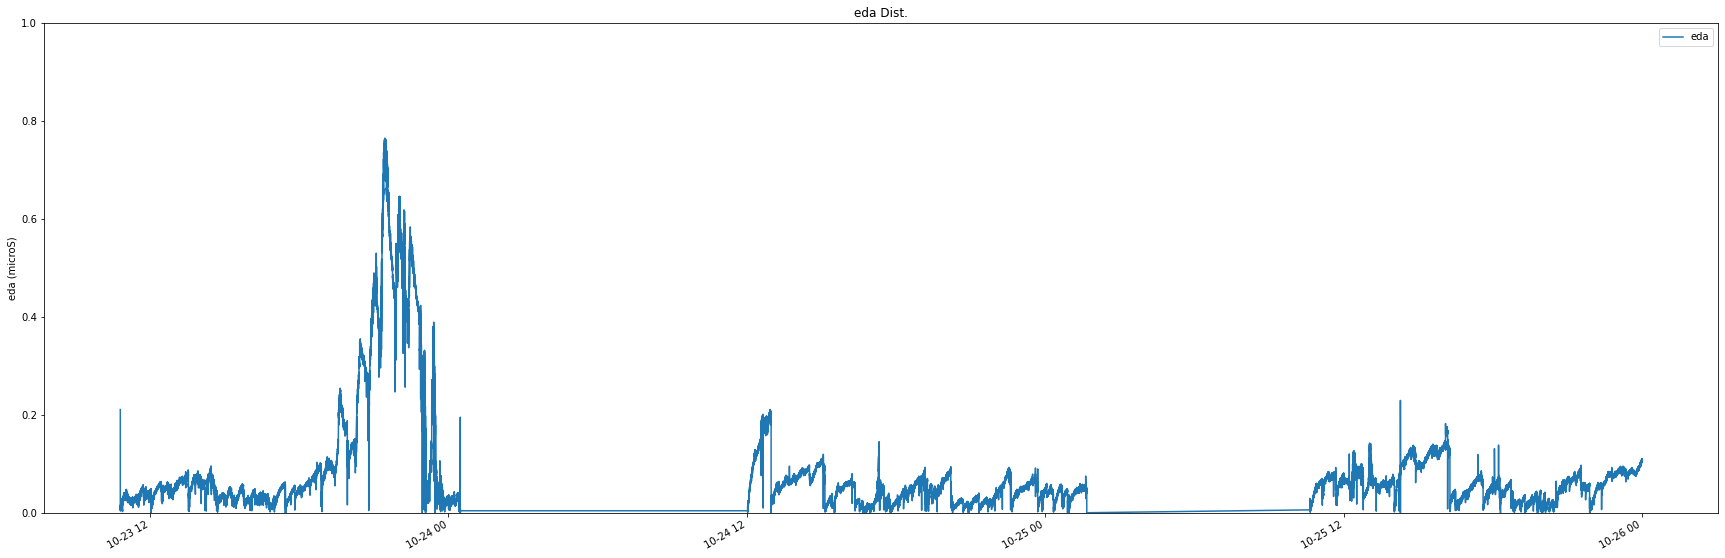

In [26]:
plt.rcParams["figure.figsize"] = (30, 10)
df_embrace_eda.plot.line(x='time', y='eda')
plt.xlabel('') # x label
plt.ylabel('eda (microS)') # y label
plt.ylim([0, 1])
plt.title('eda Dist.') # Title
plt.show()

Process the data:
1. elimilate possible invalid values
    - hard to find certain feature of invalid values
2. determine ms values to s values
    - use median value

In [27]:
# determine ms values to s values
df_embrace_eda.time = df_embrace_eda.time_ms.map(lambda t: t.round('s'))

In [28]:
df_embrace_eda.head(5)

,time,eda,time_ms
0,2020-10-23 10:48:08,0.210509,2020-10-23 10:48:08.051
1,2020-10-23 10:48:08,0.008393,2020-10-23 10:48:08.301
2,2020-10-23 10:48:09,0.017142,2020-10-23 10:48:08.551
3,2020-10-23 10:48:09,0.009085,2020-10-23 10:48:08.801
4,2020-10-23 10:48:09,0.008739,2020-10-23 10:48:09.051


In [29]:
df_embrace_eda = df_embrace_eda.groupby(by='time', as_index=False).agg({'eda': 'median'})

In [30]:
df_embrace_eda.head(5)

,time,eda
0,2020-10-23 10:48:08,0.109451
1,2020-10-23 10:48:09,0.008912
2,2020-10-23 10:48:10,0.007723
3,2020-10-23 10:48:11,0.008818
4,2020-10-23 10:48:12,0.009064


### 3.2. Skin Temp

In [31]:
pth_embrace_skin = os.path.join('./embrace', 'profiles', uid, 'skin_temp.csv')
display(pth_embrace_skin)
df_embrace_skin = pd.read_csv(pth_embrace_skin)

'./embrace/profiles/r2_03/skin_temp.csv'

In [32]:
df_embrace_skin.time = pd.to_datetime(df_embrace_skin.time)

In [33]:
df_embrace_skin['time_ms'] = df_embrace_skin.time

In [34]:
df_embrace_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146299 entries, 0 to 146298
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   time    146299 non-null  datetime64[ns]
 1   eda     146299 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 MB


In [35]:
df_embrace_skin.head(5)

,time,skin_temp,time_ms
0,2020-10-23 10:48:07.497,30.405,2020-10-23 10:48:07.497
1,2020-10-23 10:48:08.505,30.590,2020-10-23 10:48:08.505
2,2020-10-23 10:48:09.514,30.669,2020-10-23 10:48:09.514
3,2020-10-23 10:48:10.522,30.748,2020-10-23 10:48:10.522
4,2020-10-23 10:48:11.531,30.801,2020-10-23 10:48:11.531


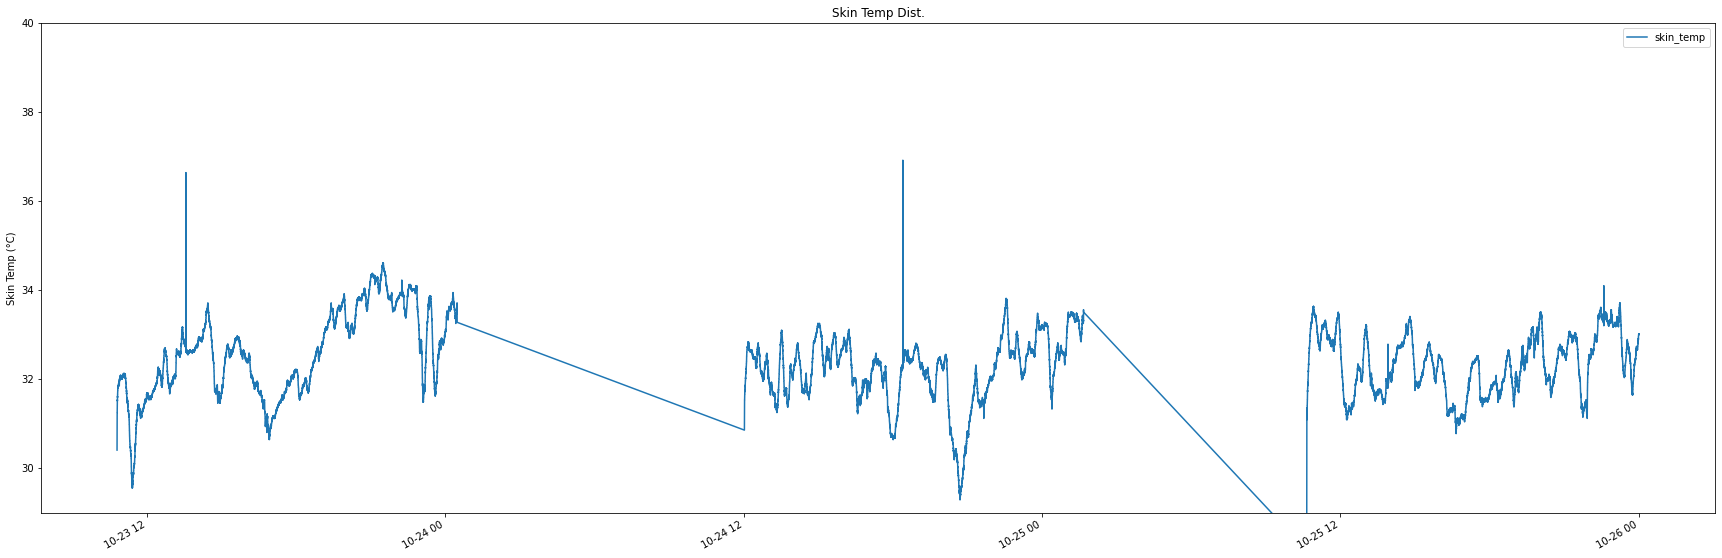

In [36]:
plt.rcParams["figure.figsize"] = (30, 10)
df_embrace_skin.plot.line(x='time', y='skin_temp')
plt.xlabel('') # x label
plt.ylabel('Skin Temp (°C)') # y label
plt.ylim([29, 40])
plt.title('Skin Temp Dist.') # Title
plt.show()

Process the data:
1. elimilate possible invalid values
    - values < 30
2. determine ms values to s values
    - use median value

In [37]:
# values < 30
df_embrace_skin = df_embrace_skin[df_embrace_skin.skin_temp >= 30]

In [38]:
df_embrace_skin.head(5)

,time,skin_temp,time_ms
0,2020-10-23 10:48:07.497,30.405,2020-10-23 10:48:07.497
1,2020-10-23 10:48:08.505,30.590,2020-10-23 10:48:08.505
2,2020-10-23 10:48:09.514,30.669,2020-10-23 10:48:09.514
3,2020-10-23 10:48:10.522,30.748,2020-10-23 10:48:10.522
4,2020-10-23 10:48:11.531,30.801,2020-10-23 10:48:11.531


In [39]:
# determine ms values to s values
df_embrace_skin.time = df_embrace_skin.time_ms.map(lambda t: t.round('s'))

In [40]:
df_embrace_skin.head(5)

,time,skin_temp,time_ms
0,2020-10-23 10:48:07,30.405,2020-10-23 10:48:07.497
1,2020-10-23 10:48:09,30.590,2020-10-23 10:48:08.505
2,2020-10-23 10:48:10,30.669,2020-10-23 10:48:09.514
3,2020-10-23 10:48:11,30.748,2020-10-23 10:48:10.522
4,2020-10-23 10:48:12,30.801,2020-10-23 10:48:11.531


In [41]:
df_embrace_skin = df_embrace_skin.groupby(by='time', as_index=False).agg({'skin_temp': 'median'})

In [42]:
df_embrace_skin.head(5)

,time,skin_temp
0,2020-10-23 10:48:07,30.405
1,2020-10-23 10:48:09,30.590
2,2020-10-23 10:48:10,30.669
3,2020-10-23 10:48:11,30.748
4,2020-10-23 10:48:12,30.801


## 4. Join

### 4.1. Outer Join Garmin

In [43]:
df_garmin = pd.merge(df_garmin_hr, df_garmin_stress, how='outer', on='time', sort=True)

In [44]:
df_garmin.head(5)

,time,heart_rate,stress_level
0,2020-10-23 00:15:00,0.0,NaN
1,2020-10-23 00:31:00,0.0,NaN
2,2020-10-23 00:47:00,0.0,NaN
3,2020-10-23 01:03:00,0.0,NaN
4,2020-10-23 01:19:00,0.0,NaN


In [45]:
df_garmin.tail(5)

,time,heart_rate,stress_level
2470,2020-10-25 23:55:00,76.0,7.0
2471,2020-10-25 23:56:00,NaN,12.0
2472,2020-10-25 23:57:00,77.0,18.0
2473,2020-10-25 23:58:00,74.0,8.0
2474,2020-10-25 23:59:00,NaN,17.0


In [46]:
df_garmin.shape

(2475, 3)

### 4.2. Outer Join Embrace

In [47]:
df_embrace = pd.merge(df_embrace_skin, df_embrace_eda, how='outer', on='time', sort=True)

In [48]:
df_embrace.head()

,time,skin_temp,eda
0,2020-10-23 10:48:07,30.405,NaN
1,2020-10-23 10:48:08,NaN,0.109451
2,2020-10-23 10:48:09,30.590,0.008912
3,2020-10-23 10:48:10,30.669,0.007723
4,2020-10-23 10:48:11,30.748,0.008818


In [49]:
df_embrace.tail()

,time,skin_temp,eda
146298,2020-10-25 23:59:56,32.993,0.106936
146299,2020-10-25 23:59:57,32.993,0.106157
146300,2020-10-25 23:59:58,33.019,0.105992
146301,2020-10-25 23:59:59,32.993,0.108452
146302,2020-10-26 00:00:00,33.019,0.108065


In [50]:
df_embrace.shape

(146303, 3)

### 4.3. Outer Join All Devices

In [51]:
df_all = pd.merge(df_hobo, df_garmin, how='outer', on='time', sort=True)

In [52]:
df_all = pd.merge(df_all, df_embrace, how='outer', on='time', sort=True)

In [53]:
df_all.head(5)

,time,env_temp,rh,heart_rate,stress_level,skin_temp,eda
0,2020-10-23 00:00:00,78.427,54.875,NaN,NaN,NaN,NaN
1,2020-10-23 00:01:00,78.471,54.848,NaN,NaN,NaN,NaN
2,2020-10-23 00:02:00,78.471,54.848,NaN,NaN,NaN,NaN
3,2020-10-23 00:03:00,78.471,54.879,NaN,NaN,NaN,NaN
4,2020-10-23 00:04:00,78.471,54.848,NaN,NaN,NaN,NaN


In [54]:
df_all.shape

(148185, 7)

In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148185 entries, 0 to 148184
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   time          148185 non-null  datetime64[ns]
 1   env_temp      4320 non-null    float64       
 2   rh            4320 non-null    float64       
 3   heart_rate    2157 non-null    float64       
 4   stress_level  1822 non-null    float64       
 5   skin_temp     144971 non-null  float64       
 6   eda           146299 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 9.0 MB


In [56]:
display(df_all.eda[0])
display(df_all.eda[0].__class__)

nan

numpy.float64

### 4.4 Round Two Minutes

In [57]:
df_all['time_m'] = df_all.time
df_all['time'] = df_all.time_m.map(lambda t: t.round('2min'))

In [58]:
df_all.head(10)

,time,env_temp,rh,heart_rate,stress_level,skin_temp,eda,time_m
0,2020-10-23 00:00:00,78.427,54.875,NaN,NaN,NaN,NaN,2020-10-23 00:00:00
1,2020-10-23 00:00:00,78.471,54.848,NaN,NaN,NaN,NaN,2020-10-23 00:01:00
2,2020-10-23 00:02:00,78.471,54.848,NaN,NaN,NaN,NaN,2020-10-23 00:02:00
3,2020-10-23 00:04:00,78.471,54.879,NaN,NaN,NaN,NaN,2020-10-23 00:03:00
4,2020-10-23 00:04:00,78.471,54.848,NaN,NaN,NaN,NaN,2020-10-23 00:04:00
5,2020-10-23 00:04:00,78.514,54.851,NaN,NaN,NaN,NaN,2020-10-23 00:05:00
6,2020-10-23 00:06:00,78.514,54.851,NaN,NaN,NaN,NaN,2020-10-23 00:06:00
7,2020-10-23 00:08:00,78.514,54.882,NaN,NaN,NaN,NaN,2020-10-23 00:07:00
8,2020-10-23 00:08:00,78.514,54.851,NaN,NaN,NaN,NaN,2020-10-23 00:08:00
9,2020-10-23 00:08:00,78.514,54.882,NaN,NaN,NaN,NaN,2020-10-23 00:09:00


In [59]:
df_all = df_all.drop(columns=['time_m'])

In [60]:
df_all.head(1)

,time,env_temp,rh,heart_rate,stress_level,skin_temp,eda
0,2020-10-23,78.427,54.875,NaN,NaN,NaN,NaN


In [61]:
# median
df_all = df_all.groupby('time', as_index=False).agg('median')

In [62]:
df_all.head()

,time,env_temp,rh,heart_rate,stress_level,skin_temp,eda
0,2020-10-23 00:00:00,78.449,54.8615,NaN,NaN,NaN,NaN
1,2020-10-23 00:02:00,78.471,54.8480,NaN,NaN,NaN,NaN
2,2020-10-23 00:04:00,78.471,54.8510,NaN,NaN,NaN,NaN
3,2020-10-23 00:06:00,78.514,54.8510,NaN,NaN,NaN,NaN
4,2020-10-23 00:08:00,78.514,54.8820,NaN,NaN,NaN,NaN


In [63]:
df_all.shape

(2161, 7)

## 5. Body Data

In [64]:
pth_body = os.path.join('./', 'body_data.csv')
display(pth_body)
df_body = pd.read_csv(pth_body)

'./body_data.csv'

In [65]:
df_body.head()

,uid,height (m),weight (kg),"gender (-1, 1)",bmi,age,1_start_time,1_end_time,2_start_time,2_end_time,3_start_time,3_end_time
0,r1_01,1.64,54.0,1,20.077335,24,2020-10-19 14:00:00,2020-10-20 02:00:00,2020-10-20 14:00:00,2020-10-21 04:00:00,2020-10-21 12:00:00,2020-10-21 23:30:00
1,r1_02,1.77,90.0,-1,28.727377,28,2020-10-19 10:00:00,2020-10-19 23:00:00,2020-10-20 11:00:00,2020-10-20 23:00:00,2020-10-21 11:30:00,2020-10-21 23:30:00
2,r1_03,1.77,58.0,-1,18.513199,23,2020-10-19 11:30:00,2020-10-19 23:00:00,2020-10-20 09:30:00,2020-10-21 00:00:00,2020-10-21 09:30:00,2020-10-21 23:30:00
3,r1_04,1.77,68.0,-1,21.705129,24,2020-10-19 00:00:00,2020-10-19 23:30:00,2020-10-20 00:00:00,2020-10-20 23:30:00,2020-10-21 00:00:00,2020-10-21 23:30:00
4,r1_05,1.80,75.0,-1,23.148148,33,2020-10-19 09:00:00,2020-10-19 22:30:00,2020-10-20 09:00:00,2020-10-20 21:30:00,2020-10-21 08:30:00,2020-10-21 22:00:00


### 5.1. Extract Body Status

In [66]:
df_status = df_body.iloc[:, :6]
df_status.columns = ['uid', 'height', 'weight', 'gender', 'bmi', 'age']

In [67]:
df_status.head()

,uid,height,weight,gender,bmi,age
0,r1_01,1.64,54.0,1,20.077335,24
1,r1_02,1.77,90.0,-1,28.727377,28
2,r1_03,1.77,58.0,-1,18.513199,23
3,r1_04,1.77,68.0,-1,21.705129,24
4,r1_05,1.80,75.0,-1,23.148148,33


### 5.2. Time

In [68]:
df_test_time = pd.DataFrame()
for col_name in df_body.columns[6:]:
    df_test_time['uid'] = df_body['uid']
    df_test_time[col_name] = pd.to_datetime(df_body[col_name])

In [69]:
df_test_time.head()

,uid,1_start_time,1_end_time,2_start_time,2_end_time,3_start_time,3_end_time
0,r1_01,2020-10-19 14:00:00,2020-10-20 02:00:00,2020-10-20 14:00:00,2020-10-21 04:00:00,2020-10-21 12:00:00,2020-10-21 23:30:00
1,r1_02,2020-10-19 10:00:00,2020-10-19 23:00:00,2020-10-20 11:00:00,2020-10-20 23:00:00,2020-10-21 11:30:00,2020-10-21 23:30:00
2,r1_03,2020-10-19 11:30:00,2020-10-19 23:00:00,2020-10-20 09:30:00,2020-10-21 00:00:00,2020-10-21 09:30:00,2020-10-21 23:30:00
3,r1_04,2020-10-19 00:00:00,2020-10-19 23:30:00,2020-10-20 00:00:00,2020-10-20 23:30:00,2020-10-21 00:00:00,2020-10-21 23:30:00
4,r1_05,2020-10-19 09:00:00,2020-10-19 22:30:00,2020-10-20 09:00:00,2020-10-20 21:30:00,2020-10-21 08:30:00,2020-10-21 22:00:00


In [70]:
df_test_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   uid           30 non-null     object        
 1   1_start_time  30 non-null     datetime64[ns]
 2   1_end_time    30 non-null     datetime64[ns]
 3   2_start_time  30 non-null     datetime64[ns]
 4   2_end_time    30 non-null     datetime64[ns]
 5   3_start_time  30 non-null     datetime64[ns]
 6   3_end_time    30 non-null     datetime64[ns]
dtypes: datetime64[ns](6), object(1)
memory usage: 1.8+ KB


### 5.3 Create One's DataFrame

In [71]:
df_one = pd.DataFrame()

#### 5.3.1. Time Series

In [72]:
time_start_1 = list(df_test_time[df_test_time['uid'] == uid]['1_start_time'])[0]
time_end_1 = list(df_test_time[df_test_time['uid'] == uid]['1_end_time'])[0]

time_start_2 = list(df_test_time[df_test_time['uid'] == uid]['2_start_time'])[0]
time_end_2 = list(df_test_time[df_test_time['uid'] == uid]['2_end_time'])[0]

time_start_3 = list(df_test_time[df_test_time['uid'] == uid]['3_start_time'])[0]
time_end_3 = list(df_test_time[df_test_time['uid'] == uid]['3_end_time'])[0]

In [73]:
t_list = []

t = time_start_1
while t <= time_end_1:
    t_list.append(t)
    t = t + pd.Timedelta('30min')

t = time_start_2
while t <= time_end_2:
    t_list.append(t)
    t = t + pd.Timedelta('30min')

t = time_start_3
while t <= time_end_3:
    t_list.append(t)
    t = t + pd.Timedelta('30min')

t_Series = pd.Series(t_list)

In [74]:
df_one['time'] = t_Series

In [75]:
df_one.head()

,time
0,2020-10-23 11:00:00
1,2020-10-23 11:30:00
2,2020-10-23 12:00:00
3,2020-10-23 12:30:00
4,2020-10-23 13:00:00


#### 5.3.2. Add body data

In [76]:
df_status.head()

,uid,height,weight,gender,bmi,age
0,r1_01,1.64,54.0,1,20.077335,24
1,r1_02,1.77,90.0,-1,28.727377,28
2,r1_03,1.77,58.0,-1,18.513199,23
3,r1_04,1.77,68.0,-1,21.705129,24
4,r1_05,1.80,75.0,-1,23.148148,33


In [77]:
one_status = list(df_status[df_status['uid'] == uid].to_dict(orient='index').values())[0]

In [78]:
one_status

{'uid': 'r2_03',
 'height': 1.77,
 'weight': 58.0,
 'gender': -1,
 'bmi': 18.51319863,
 'age': 23}

In [79]:
df_one['height'] = one_status['height']

In [80]:
df_one['weight'] = one_status['weight']

In [81]:
df_one['gender'] = one_status['gender']

In [82]:
df_one['bmi'] = one_status['bmi']

In [83]:
df_one['age'] = one_status['age']

In [84]:
df_one

,time,height,weight,gender,bmi,age
0,2020-10-23 11:00:00,1.77,58.0,-1,18.513199,23
1,2020-10-23 11:30:00,1.77,58.0,-1,18.513199,23
2,2020-10-23 12:00:00,1.77,58.0,-1,18.513199,23
3,2020-10-23 12:30:00,1.77,58.0,-1,18.513199,23
4,2020-10-23 13:00:00,1.77,58.0,-1,18.513199,23
...,...,...,...,...,...,...
78,2020-10-25 21:30:00,1.77,58.0,-1,18.513199,23
79,2020-10-25 22:00:00,1.77,58.0,-1,18.513199,23
80,2020-10-25 22:30:00,1.77,58.0,-1,18.513199,23
81,2020-10-25 23:00:00,1.77,58.0,-1,18.513199,23


## Join All But Record
`df_one` left join `df_all`

In [85]:
df_one_all_without_record = pd.merge(df_one, df_all, how='left', on='time', sort=True)

In [86]:
df_one_all_without_record.head()

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda
0,2020-10-23 11:00:00,1.77,58.0,-1,18.513199,23,77.160,60.328,81.0,15.0,32.033,0.034045
1,2020-10-23 11:30:00,1.77,58.0,-1,18.513199,23,77.639,58.077,115.0,NaN,30.087,0.028956
2,2020-10-23 12:00:00,1.77,58.0,-1,18.513199,23,77.464,57.167,82.0,41.0,31.667,0.041033
3,2020-10-23 12:30:00,1.77,58.0,-1,18.513199,23,77.990,57.396,111.0,NaN,32.163,0.040863
4,2020-10-23 13:00:00,1.77,58.0,-1,18.513199,23,77.990,57.670,98.0,72.0,31.929,0.054089


In [87]:
df_one_all_without_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          83 non-null     datetime64[ns]
 1   height        83 non-null     float64       
 2   weight        83 non-null     float64       
 3   gender        83 non-null     int64         
 4   bmi           83 non-null     float64       
 5   age           83 non-null     int64         
 6   env_temp      83 non-null     float64       
 7   rh            83 non-null     float64       
 8   heart_rate    73 non-null     float64       
 9   stress_level  70 non-null     float64       
 10  skin_temp     80 non-null     float64       
 11  eda           80 non-null     float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 8.4 KB


## 6. Record

In [88]:
pth_record = os.path.join('./record', uid + '.csv')
display(pth_record)
df_record = pd.read_csv(pth_record)

'./record/r2_03.csv'

In [89]:
df_record.head()

,Date,Time,TC,TS,Clo,Act
0,2020-10-23,00:00,NaN,NaN,NaN,NaN
1,2020-10-23,00:30,NaN,NaN,NaN,NaN
2,2020-10-23,01:00,NaN,NaN,NaN,NaN
3,2020-10-23,01:30,NaN,NaN,NaN,NaN
4,2020-10-23,02:00,NaN,NaN,NaN,NaN


In [90]:
df_record['time'] = df_record.Date + ' ' + df_record.Time + ':00'

In [91]:
df_record['time'] = pd.to_datetime(df_record['time'])

In [92]:
df_record = df_record.drop(axis=1, columns=['Date', 'Time'])

In [93]:
df_record

,TC,TS,Clo,Act,time
0,NaN,NaN,NaN,NaN,2020-10-23 00:00:00
1,NaN,NaN,NaN,NaN,2020-10-23 00:30:00
2,NaN,NaN,NaN,NaN,2020-10-23 01:00:00
3,NaN,NaN,NaN,NaN,2020-10-23 01:30:00
4,NaN,NaN,NaN,NaN,2020-10-23 02:00:00
...,...,...,...,...,...
139,3.0,3.0,0.36,0.8,2020-10-25 21:30:00
140,3.0,3.0,0.36,0.8,2020-10-25 22:00:00
141,4.0,4.0,0.36,0.8,2020-10-25 22:30:00
142,3.0,3.0,0.36,1.0,2020-10-25 23:00:00


In [94]:
df_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TC      83 non-null     float64       
 1   TS      83 non-null     float64       
 2   Clo     83 non-null     float64       
 3   Act     83 non-null     float64       
 4   time    144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 5.8 KB


### 6.1. Left Join Record

In [95]:
df_one_all = pd.merge(df_one_all_without_record, df_record, how='left', on='time', sort=True)

In [96]:
df_one_all.head()

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
0,2020-10-23 11:00:00,1.77,58.0,-1,18.513199,23,77.160,60.328,81.0,15.0,32.033,0.034045,4.0,4.0,0.36,1.2
1,2020-10-23 11:30:00,1.77,58.0,-1,18.513199,23,77.639,58.077,115.0,NaN,30.087,0.028956,4.0,4.0,0.36,2.5
2,2020-10-23 12:00:00,1.77,58.0,-1,18.513199,23,77.464,57.167,82.0,41.0,31.667,0.041033,4.0,4.0,0.36,1.0
3,2020-10-23 12:30:00,1.77,58.0,-1,18.513199,23,77.990,57.396,111.0,NaN,32.163,0.040863,4.0,4.0,0.36,1.1
4,2020-10-23 13:00:00,1.77,58.0,-1,18.513199,23,77.990,57.670,98.0,72.0,31.929,0.054089,4.0,4.0,0.36,1.0


In [97]:
df_one_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          83 non-null     datetime64[ns]
 1   height        83 non-null     float64       
 2   weight        83 non-null     float64       
 3   gender        83 non-null     int64         
 4   bmi           83 non-null     float64       
 5   age           83 non-null     int64         
 6   env_temp      83 non-null     float64       
 7   rh            83 non-null     float64       
 8   heart_rate    73 non-null     float64       
 9   stress_level  70 non-null     float64       
 10  skin_temp     80 non-null     float64       
 11  eda           80 non-null     float64       
 12  TC            83 non-null     float64       
 13  TS            83 non-null     float64       
 14  Clo           83 non-null     float64       
 15  Act           83 non-null     float64     

In [98]:
# df_one_all = df_one_all.drop(axis=1, columns='time')

In [99]:
df_one_all.shape

(83, 16)

In [100]:
df_one_all

,time,height,weight,gender,bmi,age,env_temp,rh,heart_rate,stress_level,skin_temp,eda,TC,TS,Clo,Act
0,2020-10-23 11:00:00,1.77,58.0,-1,18.513199,23,77.160,60.328,81.0,15.0,32.033,0.034045,4.0,4.0,0.36,1.2
1,2020-10-23 11:30:00,1.77,58.0,-1,18.513199,23,77.639,58.077,115.0,NaN,30.087,0.028956,4.0,4.0,0.36,2.5
2,2020-10-23 12:00:00,1.77,58.0,-1,18.513199,23,77.464,57.167,82.0,41.0,31.667,0.041033,4.0,4.0,0.36,1.0
3,2020-10-23 12:30:00,1.77,58.0,-1,18.513199,23,77.990,57.396,111.0,NaN,32.163,0.040863,4.0,4.0,0.36,1.1
4,2020-10-23 13:00:00,1.77,58.0,-1,18.513199,23,77.990,57.670,98.0,72.0,31.929,0.054089,4.0,4.0,0.36,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-10-25 21:30:00,1.77,58.0,-1,18.513199,23,78.208,54.292,88.0,56.0,32.889,0.083326,3.0,3.0,0.36,0.8
79,2020-10-25 22:00:00,1.77,58.0,-1,18.513199,23,76.899,51.083,84.0,10.0,32.500,0.017662,3.0,3.0,0.36,0.8
80,2020-10-25 22:30:00,1.77,58.0,-1,18.513199,23,77.203,52.572,83.0,NaN,33.379,0.060811,4.0,4.0,0.36,0.8
81,2020-10-25 23:00:00,1.77,58.0,-1,18.513199,23,77.553,52.915,80.0,18.0,33.199,0.081880,3.0,3.0,0.36,1.0
